# Phase 1: Data Pre-Processing
The following code for phase 1 of the problem consists of necessary steps to pre-process the selected data such that it is suitable for ML algorithms and value can be extracted from it. This phase consists of:
1. Loading the data
2. Dealing with null values
3. Converting categorical data to numerical data
4. Normalisation of continuous data 

In [1]:
#imports required for whole notebook.
import numpy.random as rand
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import sklearn
import copy

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [3]:
#load the data and preview it.
labelled_df = pd.read_csv('loan_sanction_train.csv')
labelled_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#summarising the data: the columns and their data-types
print(labelled_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [5]:
print("Entries with at least one null: ",len(labelled_df[labelled_df.isnull().any(axis=1)]))
print(labelled_df.isnull().sum())

Entries with at least one null:  134
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [6]:
dataframe = labelled_df.dropna(inplace=False)
#Exclude loan ID column - unique identifier.
dataframe=dataframe.drop(['Loan_ID'], axis='columns')
dataframe = dataframe.reset_index(drop=True)

print("Remaining datapoints after dropping any rows with at least 1 null value:",len(dataframe))
#i.e. there are 134 data points with at least one null value. 
print("Of which the loan was rejected:", sum(dataframe['Loan_Status']=='N'))
print("Of which the loan was approved:", sum(dataframe['Loan_Status']=='Y'))

Remaining datapoints after dropping any rows with at least 1 null value: 480
Of which the loan was rejected: 148
Of which the loan was approved: 332


In [7]:
#again, view the data
dataframe

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
475,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
476,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
477,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
478,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
dataframe.columns[dataframe.dtypes=='object']

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
#summary of categorical attributes: the number of categories and their possible values.
summary = {}
for col in dataframe :
    if dataframe[col].dtype=='object':
        summary[col] =str(len(dataframe[col].unique()))+"  "+str(dataframe[col].unique())
print("Summary of row name, count of unique value, list of unique value for all categorical attributes:")
for line in summary:
    print(line, summary[line])
    

Summary of row name, count of unique value, list of unique value for all categorical attributes:
Gender 2  ['Male' 'Female']
Married 2  ['Yes' 'No']
Dependents 4  ['1' '0' '2' '3+']
Education 2  ['Graduate' 'Not Graduate']
Self_Employed 2  ['No' 'Yes']
Property_Area 3  ['Rural' 'Urban' 'Semiurban']
Loan_Status 2  ['N' 'Y']


In [10]:
object_columms = list(dataframe.columns[dataframe.dtypes=='object'])
#specically remove and deal with 'Dependents', as this is a nominal categorical attribute
object_columms.remove('Dependents')
print(object_columms)

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [11]:
#deal with ordinal Dependents column
dataframe = pd.get_dummies(columns = object_columms, data = dataframe)
dataframe['Dependents_Ordinal']=0
dataframe.loc[dataframe['Dependents']=='0', 'Dependents_Ordinal'] = 0
dataframe.loc[dataframe['Dependents']=='1', 'Dependents_Ordinal'] = 1
dataframe.loc[dataframe['Dependents']=='2', 'Dependents_Ordinal'] = 2
dataframe.loc[dataframe['Dependents']=='3+', 'Dependents_Ordinal'] = 3
list(dataframe.columns)

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Gender_Female',
 'Gender_Male',
 'Married_No',
 'Married_Yes',
 'Education_Graduate',
 'Education_Not Graduate',
 'Self_Employed_No',
 'Self_Employed_Yes',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'Loan_Status_N',
 'Loan_Status_Y',
 'Dependents_Ordinal']

In [12]:
#eliminating redundant columns
dataframe=dataframe.drop(['Gender_Male','Married_Yes','Education_Not Graduate','Self_Employed_Yes','Property_Area_Urban','Loan_Status_N', 'Dependents'], axis='columns')
dataframe

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Married_No,Education_Graduate,Self_Employed_No,Property_Area_Rural,Property_Area_Semiurban,Loan_Status_Y,Dependents_Ordinal
0,4583,1508.0,128.0,360.0,1.0,0,0,1,1,1,0,0,1
1,3000,0.0,66.0,360.0,1.0,0,0,1,0,0,0,1,0
2,2583,2358.0,120.0,360.0,1.0,0,0,0,1,0,0,1,0
3,6000,0.0,141.0,360.0,1.0,0,1,1,1,0,0,1,0
4,5417,4196.0,267.0,360.0,1.0,0,0,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,2900,0.0,71.0,360.0,1.0,1,1,1,1,1,0,1,0
476,4106,0.0,40.0,180.0,1.0,0,0,1,1,1,0,1,3
477,8072,240.0,253.0,360.0,1.0,0,0,1,1,0,0,1,1
478,7583,0.0,187.0,360.0,1.0,0,0,1,1,0,0,1,2


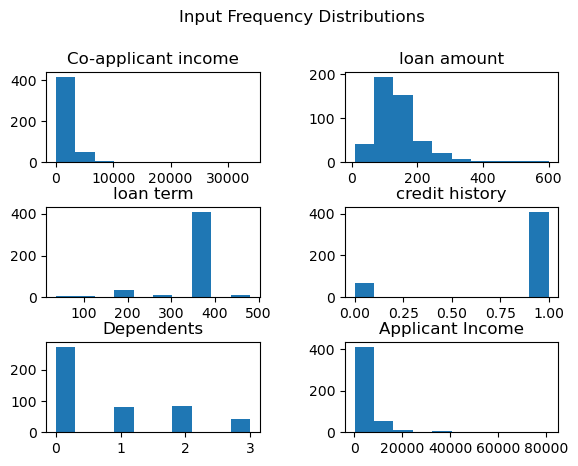

In [13]:
#Finally, scaling of continuous data. First, deterime the distributions to select the most appropriate scaling method

plt.subplot(3, 2, 1)
plt.title('Co-applicant income') 
plt.hist(dataframe['CoapplicantIncome'])


plt.subplot(3, 2, 2)
plt.hist(dataframe['LoanAmount'])
plt.title('loan amount')  

plt.subplot(3, 2, 3)
plt.hist(dataframe['Loan_Amount_Term'])
plt.title('loan term')  

plt.subplot(3, 2, 4)
plt.hist(dataframe['Credit_History'])
plt.title('credit history')  

plt.subplot(3, 2, 5)
plt.hist(dataframe['Dependents_Ordinal'])
plt.title('Dependents') 

plt.subplot(3, 2, 6)
plt.hist(dataframe['ApplicantIncome'])
plt.title('Applicant Income') 

#plt.figure(figsize=(20,13))
plt.suptitle("Input Frequency Distributions")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.85, 
                    wspace=0.4, 
                    hspace=0.5)
plt.show() 


In [14]:
#Given credit history is already binary data and the remaining attributes have a skewed distribution, use z-score scaling:
dataframe['LoanAmount'] = zscore(dataframe['LoanAmount'])
dataframe['CoapplicantIncome'] = zscore(dataframe['CoapplicantIncome'])
dataframe['Loan_Amount_Term'] = zscore(dataframe['Loan_Amount_Term'])
dataframe['Dependents_Ordinal'] = zscore(dataframe['Dependents_Ordinal'])
dataframe['ApplicantIncome'] = zscore(dataframe['ApplicantIncome'])

In [15]:
#check means are equal to 0 as a result of normalising. 
round(dataframe[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Dependents_Ordinal','ApplicantIncome']].mean(),1)

CoapplicantIncome     0.0
LoanAmount           -0.0
Loan_Amount_Term     -0.0
Dependents_Ordinal    0.0
ApplicantIncome       0.0
dtype: float64

In [16]:
#check standard deviation is equal to 1 as a result of normalising. 
round(dataframe[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Dependents_Ordinal','ApplicantIncome']].std(),1)

CoapplicantIncome     1.0
LoanAmount            1.0
Loan_Amount_Term      1.0
Dependents_Ordinal    1.0
ApplicantIncome       1.0
dtype: float64

In [17]:
#final preview of pre-processed data:
dataframe.reset_index(inplace=True, drop=True)
dataframe

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Married_No,Education_Graduate,Self_Employed_No,Property_Area_Rural,Property_Area_Semiurban,Loan_Status_Y,Dependents_Ordinal
0,-0.137970,-0.027952,-0.208089,0.275542,1.0,0,0,1,1,1,0,0,0.218599
1,-0.417536,-0.604633,-0.979001,0.275542,1.0,0,0,1,0,0,0,1,-0.762033
2,-0.491180,0.297100,-0.307562,0.275542,1.0,0,0,0,1,0,0,1,-0.762033
3,0.112280,-0.604633,-0.046446,0.275542,1.0,0,1,1,1,0,0,1,-0.762033
4,0.009319,0.999978,1.520245,0.275542,1.0,0,0,1,0,0,0,1,1.199231
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,-0.435196,-0.604633,-0.916831,0.275542,1.0,1,1,1,1,1,0,1,-0.762033
476,-0.222210,-0.604633,-1.302286,-2.487549,1.0,0,0,1,1,1,0,1,2.179863
477,0.478206,-0.512854,1.346168,0.275542,1.0,0,0,1,1,0,0,1,0.218599
478,0.391846,-0.604633,0.525520,0.275542,1.0,0,0,1,1,0,0,1,1.199231


# Phase 2: Test and Training Data
In order to train and test the final model, we need a train - test data split. Note that during the model comparison, over-sampling was used, and so should also be used here

In [18]:
# Defining a useful function for a simple split of data into training, validation and test sets. CHECK X and Y

def split_data(data_df, data_split):
    """divide the data into training, validate and test sets. 
    :param data: a dataframe of the data
    :param data_split: a list of the fraction of the data to be in each set of form 
    [training_fraction, validation_fraction, test_fraction]. The fractions should all add up to 1.
    :returns training_dict, validation_dict, test_dict: dictionaries of the same form as the data_df, 
    containing the different sets"""
    
    assert np.sum(data_split)-1 < 0.01
    
    # work out how many datapoints will be in the train and validation sets 
    n_train = int(len((data_df))*data_split[0])
    n_validate = int(len((data_df))*data_split[1])
                     
    # generate a random permutation of indices of the data and split into training, validation and test
    perm = np.random.permutation(range(len(data_df)))
    indices_train, indices_validate, indices_test = np.split(perm, [n_train, n_train+ n_validate])
    # create training, validation and test DFs 
    training_df = data_df.iloc[indices_train]
    validation_df = data_df.iloc[indices_validate]
    test_df = data_df.iloc[indices_test]
    
    return training_df, validation_df, test_df

#Note - no validation data required, since hyper parameters have already been tuned.
train, val, test = split_data(dataframe, [0.75,0, 0.25])

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [19]:
#Defining a custom function that will take a data set and return a sub-set that contains all rejected cases,
# and a random set of positive cases, up to the numer of negatives.

def over_sample_simple(data, output_column_name, class_of_interest):
    set_of_interest = data[data[output_column_name] == class_of_interest]
    #find the remaining points:
    set_remaining = data[data[output_column_name] != class_of_interest]
    
    set_of_interest.reset_index(inplace=True, drop=True)
    set_remaining.reset_index(inplace=True, drop=True)
    
    count_class_of_interest= len(set_of_interest)
    count_other = len(set_remaining)
    
    train_set = set_of_interest
    
    if count_class_of_interest >= count_other:
        train_set = pd.concat([set_of_interest,set_remaining], ignore_index=True)
    if count_class_of_interest < count_other:
        perm = np.random.permutation(range(len(set_of_interest))) 
        train_set = pd.concat([set_of_interest,set_remaining.iloc[perm]], ignore_index=True)
        train_set = train_set.sample(frac = 1)
        train_set.reset_index(inplace=True, drop=True)
    return train_set

train=over_sample_simple(train, 'Loan_Status_Y', 0)
train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Married_No,Education_Graduate,Self_Employed_No,Property_Area_Rural,Property_Area_Semiurban,Loan_Status_Y,Dependents_Ordinal
0,-0.429015,-0.604633,-0.581111,0.275542,1.0,0,1,1,1,0,1,1,-0.762033
1,0.029629,1.172829,0.214669,0.275542,1.0,0,1,1,1,1,0,1,1.199231
2,0.134356,0.016790,0.525520,2.117602,1.0,0,0,0,1,0,1,0,1.199231
3,-0.180178,-0.323176,-0.717886,0.275542,1.0,0,0,0,0,0,1,0,-0.762033
4,-0.424953,0.504369,-0.170787,0.275542,1.0,0,0,1,1,0,1,1,-0.762033
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,-0.369323,0.091361,-0.792490,0.275542,1.0,0,0,0,1,0,0,1,1.199231
210,-0.505838,-0.604633,-1.115776,0.275542,1.0,0,1,1,1,0,1,1,-0.762033
211,-0.461687,0.099774,-0.369732,0.275542,1.0,0,0,1,1,0,1,1,0.218599
212,-0.458508,0.141075,0.127630,0.275542,1.0,0,0,1,1,1,0,1,-0.762033


# Phase 3: Performance Metics
We will consider 'rejected' the important class (we want to absolutely minimise the number of actual rejections that are wrongly classified as positives, i.e. false positves).As discussed else where, the performance metrics of choice are:
- misclassification rate; overall indicator with an aim to minimise, but has less priority over other performance metrics. (false pos + false neg) / total cases
- false psotive absolute number; our aim is to absolutely minimise this value.
- specificity: true negatives / (true negatives + false positves) - our aim (and priority) is get this value as close as 1 to possible, indicating that we are wrongly classifying rejected cases as approved as little as possible.
- sensitivity: the fraction of approved cases that we correctly classify. Second priority, aiming to maximise. 

Theoretically, a naive prediction of always rejecting would achieve 100% specificity and 0% sensitivity. Therefore, a good model will still retain a near-100% specificity whilst achieving the highest possible sensitivity.

In [20]:

def return_metrics(y_test,y_pred):
    cm = confusion_matrix(y_true=y_test,y_pred= y_pred)
    nr_pos = np.sum(y_pred == 1)
    true_neg, false_pos, false_neg, true_pos = cm.ravel()
    misclassification_rate = (false_pos + false_neg)/np.sum(cm)
    specificity = true_neg / (true_neg + false_pos) #what fraction of action negatives are we getting right
    sensitivity = true_pos / (true_pos + false_neg) #or recall (out of positives what percent can we guess)
    return false_pos, misclassification_rate, specificity, sensitivity


In [21]:
#testing a naive estimator: expect no false positives, ~1/2 misclassification, 100% specificity and 0% sensitivity. This is 
#the baseline on which will attempt to improve
test_y = dataframe['Loan_Status_Y']
pred_y =np.zeros (shape = len(dataframe))
print(return_metrics(test_y, pred_y))


(0, 0.6916666666666667, 1.0, 0.0)


# Phase 3: Model Training
Now we must train the neural network model with the parameters found during hyper param tuning

In [22]:
!pip install torch
!pip install torchvision
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

In [23]:
from torch.utils.data import Dataset, TensorDataset
from torch.utils.data import DataLoader
import torch.optim as optim
import itertools

In [24]:
#build the model based on the optimised hyper-params
act_fun = nn.ReLU()
no_neurons_per_layer = 80


class Net(nn.Module):

    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(12, no_neurons_per_layer)
        self.act1 = act_fun
        self.layer2 = nn.Linear(no_neurons_per_layer, no_neurons_per_layer)
        self.act2 = act_fun
        self.layer3 = nn.Linear(no_neurons_per_layer, no_neurons_per_layer)
        self.act3 = act_fun
        self.output = nn.Linear(no_neurons_per_layer, 1)
        self.sigmoid = nn.Sigmoid()
 
    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.act3(self.layer3(x))
        x = self.sigmoid(self.output(x))
        return x
        
    def weights_init_uniform_rule(m):
        classname = m.__class__.__name__
        # for every Linear layer in a model..
        if classname.find('Linear') != -1:
            # get the number of the inputs
            n = m.in_features
            y = 1.0/np.sqrt(n)
            m.weight.data.uniform_(-y, y)
            m.bias.data.fill_(0)
    
    
net = Net()
net.weights_init_uniform_rule()
print(net)

Net(
  (layer1): Linear(in_features=12, out_features=80, bias=True)
  (act1): ReLU()
  (layer2): Linear(in_features=80, out_features=80, bias=True)
  (act2): ReLU()
  (layer3): Linear(in_features=80, out_features=80, bias=True)
  (act3): ReLU()
  (output): Linear(in_features=80, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [25]:
#Set lr and momentum hyperparams
lr = 0.005
momentum = 0.75
criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum)

In [26]:
#training and testing data prep - setting batch size (bs) hyper param

bs=30

X_train = train.drop(columns="Loan_Status_Y") #drop the purchase column
y_train = train.Loan_Status_Y #take the purchase column
X_test = test.drop(columns="Loan_Status_Y")
y_test = test.Loan_Status_Y
        
        #Convert to tensors
X_tensor =  torch.tensor(X_train.values).float()
y_tensor =  torch.tensor(y_train.values.ravel()).float()
X_test_tensor =  torch.tensor(X_test.values).float()
y_test_tensor =  torch.tensor(y_test.values.ravel()).float()
        
        
        #data loader
        
        
y_tensor = y_tensor.unsqueeze(1)
train_ds = TensorDataset(X_tensor, y_tensor)
train_dl = DataLoader(train_ds, batch_size=bs)

y_test_tensor = y_test_tensor.unsqueeze(1)
test_ds = TensorDataset(X_test_tensor, y_test_tensor)

In [27]:
#perform training, setting no. epochs hyper param
no_epochs=1000


train_loss = []
for epoch in range(no_epochs):
    #running_loss = 0.0
    for i, data in enumerate(train_dl):
        xb, yb = data
        optimizer.zero_grad()
                
        outputs = net(xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()
    train_loss.append(loss.item())
print('Last iteration loss value: '+str(loss.item()))
        
print('Finished Training')

Last iteration loss value: 0.011259977705776691
Finished Training


120


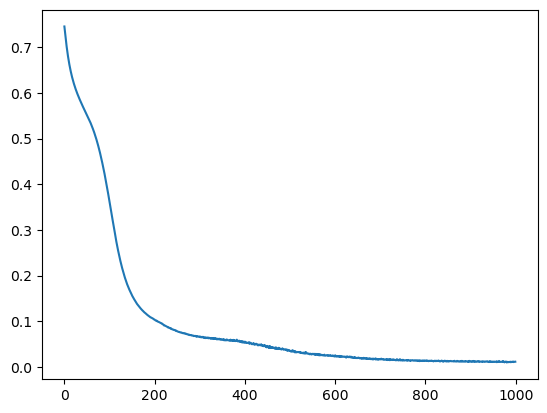

Misclassification rate: 0.35 Specificity 0.7073170731707317 sensitivity 0.620253164556962


In [28]:
#testing, and calculating test metrics
y_pred=[]
net.eval()
with torch.no_grad():
    for xb_test,yb_test  in test_ds:
        outputs = net(xb_test)
        y_pred_tag = torch.round(outputs)
        y_pred.append(y_pred_tag.detach().numpy())
                
y_pred = [a.squeeze().tolist() for a in y_pred]
print(len(y_pred))
        
        
nr_false_pos, nr_misclassification_rate, specificity, sensitivity = return_metrics(y_test = y_test, y_pred = y_pred)

        

plt.plot(train_loss)    
plt.show()

    
print(
    "Misclassification rate:",nr_misclassification_rate, 
    "Specificity",specificity, 
    "sensitivity",sensitivity)